In [1]:
from scipy.linalg import hilbert
from efficient_eigensolvers import PowerMethod, QR_shifted, QR_unshifted, QR_wilkinson_shift, RayleighQuotientIteration
from matricesGenerator import matrix_generator
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Hilbert Matrix
We have to manually input actual eigenvalue-eigenvector pairs
for Hilbert matrices in dimension 3 to 10 according to
the results from Henry E. Fettis and James C. Caslin.

### Hilbert matrices' identity information

In [2]:
Hilbert_dominant_eigenpair_dict = {}
Hilbert_dominant_eigenpair_dict[3] = [1.40831, np.array([1.00000, .556032, .390907])]
Hilbert_dominant_eigenpair_dict[4] = [1.50021, np.array([1.00000, .570172, .406778, .318140])]
Hilbert_dominant_eigenpair_dict[5] = [1.56705, np.array([1.00000, .580566, .418800, .330061, .273258])]
Hilbert_dominant_eigenpair_dict[6] = [1.61889, np.array([1.00000, .588628, .428327, .339661, .282523, .242337])]
Hilbert_dominant_eigenpair_dict[7] = [1.66088, np.array([1.00000, .595122, .436126, .347622, .290284, .249777, .219495])]
Hilbert_dominant_eigenpair_dict[8] = [1.69593, np.array([1.00000, .600504, .442671, .354370, .296918, .256180, .225629, .201790])]
Hilbert_dominant_eigenpair_dict[9] = [1.72588, np.array([1.00000, .605062, .448271, .360192, .302681, .261776, .231016, .206956, .187577])]
Hilbert_dominant_eigenpair_dict[10] = [1.75191, np.array([1.00000, .608991, .453138, .365286, .307753, .266725, .235801, .211563, .192005, .175860])]
Hilbert_dominant_eigenpair_dict[20] = [1.90713, np.array([1.00000, .631539, .481706, .395779, .338641, .297328, .265798, .240801, .220416, .203426, .189015, .176618, .165826, .156335, .147918, .140395, .133629,.127507, .121939, .116851])]

We calculated residue, distance, real-valued residue.

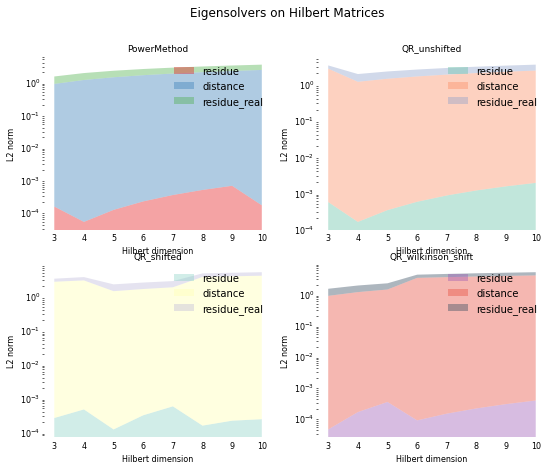

In [3]:
def Hilbert_test(dim, func):
    A = hilbert(dim)
    eigenvec, eigenval, iterations = func(A)

    residue = np.linalg.norm(A.dot(eigenvec) - eigenval * eigenvec)

    eigenval_real, eigenvec_real = Hilbert_dominant_eigenpair_dict[dim][1], Hilbert_dominant_eigenpair_dict[dim][0]
    eigenvec_real= eigenvec_real / np.linalg.norm(eigenvec_real)
    dist = np.linalg.norm(eigenvec_real - eigenvec)
    residue_real_val = np.linalg.norm(A.dot(eigenvec) - eigenval_real * eigenvec)
    return residue, dist, residue_real_val


if __name__ == '__main__':
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    axs = [ax1, ax2, ax3, ax4]
    #, QR_unshifted, QR_shifted, QR_wilkinson_shift
    for k, func in enumerate([PowerMethod, QR_unshifted, QR_shifted, QR_wilkinson_shift]):
        residue_list = []
        dist_list = []
        residue_real_val_list = []

        for i in range(3,11):
            r, d, rv = Hilbert_test(i, func)
            residue_list.append(r)
            dist_list.append(d)
            residue_real_val_list.append(rv)

        x = range(3, 11)
        y = [residue_list, dist_list, residue_real_val_list]
        # use a known color palette (see..)

        if k != 3:
            pal = sns.color_palette("Set" + str(k+1))
        else:
            pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
        axs[k].stackplot(x, y, labels=['residue', 'distance', 'residue_real'], colors=pal, alpha=0.4)
        axs[k].legend(loc='upper right', frameon=False)

        axs[k].spines["top"].set_visible(False)
        axs[k].spines["bottom"].set_visible(False)
        axs[k].spines["right"].set_visible(False)
        axs[k].spines["left"].set_visible(False)
        axs[k].set_title(f'{func.__name__}', fontsize=9)
        axs[k].get_xaxis().tick_bottom()
        axs[k].get_yaxis().tick_left()
        axs[k].tick_params(labelsize=8)
        axs[k].set_xlabel('Hilbert dimension', fontsize=8)
        axs[k].set_ylabel('L2 norm', fontsize=8)
        axs[k].set(yscale='log')
        axs[k].xaxis.set_tick_params(length=0)
        axs[k].yaxis.set_tick_params(length=0)
        sns.despine(left=True, bottom=True)
    # Your x and y axis
    fig.suptitle('Eigensolvers on Hilbert Matrices\n')
    fig.set_size_inches(9, 7)
    fig.savefig('EigensolversOnHilbert.png',dpi=100)
    plt.show()
